<a href="https://colab.research.google.com/github/NguyenTanPhats/Exercies_AI/blob/main/Vietnamese_dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing important libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/Colab Notebooks/foods/Train'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/Colab Notebooks/foods/Train'

In [ ]:

train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 20, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 20, class_mode = 'categorical')

Found 1747 images belonging to 11 classes.
Found 1747 images belonging to 11 classes.


In [ ]:



train_dataset.class_indices


{'Banh beo': 0,
 'Banh chung': 1,
 'Banh cuon': 2,
 'Banh duc': 3,
 'Banh mi': 4,
 'Banh pia': 5,
 'Banh trang nuong': 6,
 'Banh xeo': 7,
 'Bun bo Hue': 8,
 'Bun dau mam tom': 9,
 'Bun rieu': 10}

In [ ]:

model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(11,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset,batch_size=64,epochs=35,verbose=1,validation_data=validation_dataset)

Epoch 1/35
88/88 [==============================] - 348s 4s/step - loss: 2.3943 - accuracy: 0.1317 - val_loss: 2.3243 - val_accuracy: 0.2066
Epoch 2/35
88/88 [==============================] - 346s 4s/step - loss: 2.2311 - accuracy: 0.2066 - val_loss: 2.0612 - val_accuracy: 0.2816
Epoch 3/35
88/88 [==============================] - 401s 5s/step - loss: 2.1096 - accuracy: 0.2696 - val_loss: 2.1337 - val_accuracy: 0.2444
Epoch 4/35
88/88 [==============================] - 401s 5s/step - loss: 1.9945 - accuracy: 0.3200 - val_loss: 1.8202 - val_accuracy: 0.3686
Epoch 5/35
88/88 [==============================] - 403s 5s/step - loss: 1.8267 - accuracy: 0.3864 - val_loss: 1.7595 - val_accuracy: 0.3910
Epoch 6/35
88/88 [==============================] - 346s 4s/step - loss: 1.8236 - accuracy: 0.3623 - val_loss: 1.7159 - val_accuracy: 0.3818
Epoch 7/35
88/88 [==============================] - 345s 4s/step - loss: 1.6727 - accuracy: 0.4247 - val_loss: 1.4569 - val_accuracy: 0.5009
Epoch 8/35
88

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/foods/foods.h5')

In [ ]:
classificationFood_model = load_model('/content/drive/MyDrive/Colab Notebooks/foods/foods.h5')

In [ ]:
score=classificationFood_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

88/88 [==============================] - 95s 1s/step - loss: 0.1414 - accuracy: 0.9571
Test loss =  0.14141803979873657
Test accuracy =  0.9570692777633667


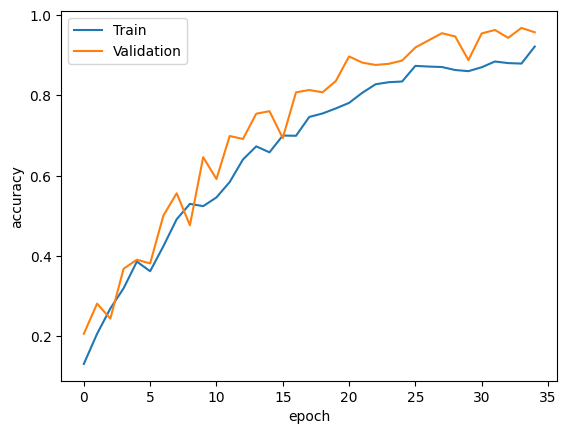

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

1/1 [==============================] - 1s 658ms/step
Predict is:  Banh mi


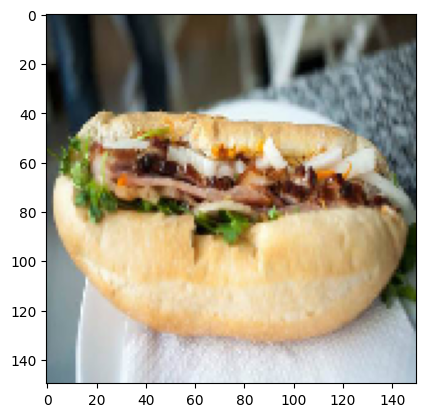

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/foods/Test/Banh mi/580.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banh beo','Banh chung','Banh cuon','Banh duc','Banh mi','Banh pia','Banh trang nuong','Banh xeo','Bun bo Hue',
 'Bun dau mam tom','Bun rieu']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 131ms/step
Predict is:  Banh chung


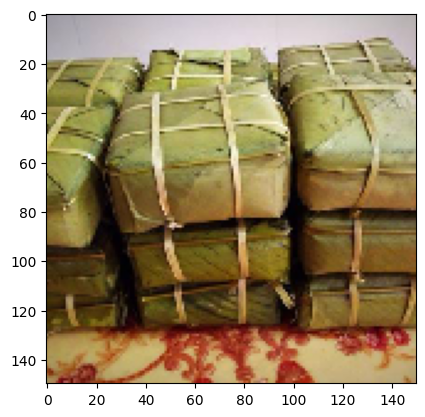

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/foods/Test/Banh chung/92.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banh beo','Banh chung','Banh cuon','Banh duc','Banh mi','Banh pia','Banh trang nuong','Banh xeo','Bun bo Hue',
 'Bun dau mam tom','Bun rieu']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 128ms/step
Predict is:  Bun dau mam tom


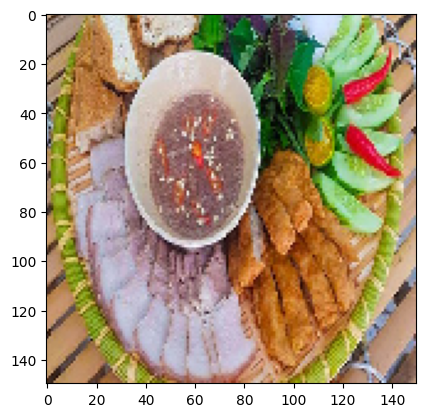

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/foods/Test/Bun dau mam tom/354.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banh beo','Banh chung','Banh cuon','Banh duc','Banh mi','Banh pia','Banh trang nuong','Banh xeo','Bun bo Hue',
 'Bun dau mam tom','Bun rieu']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 55ms/step
Predict is:  Bun rieu


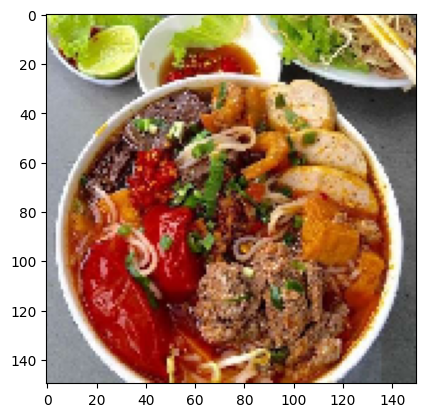

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/foods/Test/Bun rieu/198.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banh beo','Banh chung','Banh cuon','Banh duc','Banh mi','Banh pia','Banh trang nuong','Banh xeo','Bun bo Hue',
 'Bun dau mam tom','Bun rieu']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 155ms/step
Predict is:  Banh xeo


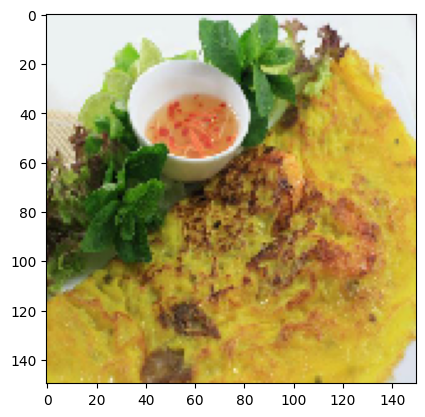

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/foods/Test/Banh xeo/332.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banh beo','Banh chung','Banh cuon','Banh duc','Banh mi','Banh pia','Banh trang nuong','Banh xeo','Bun bo Hue',
 'Bun dau mam tom','Bun rieu']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Vietnamese dishes.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2023-04-20 06:33:30--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2023-04-20 06:33:30 (25.2 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurab

'File Download Unsuccessful. Saved in Google Drive'